Confusion Matrix:
 [[70  1]
 [ 2 41]]
Precision: 0.9761904761904762
Recall: 0.9534883720930233
ROC-AUC: 0.99737962659679
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



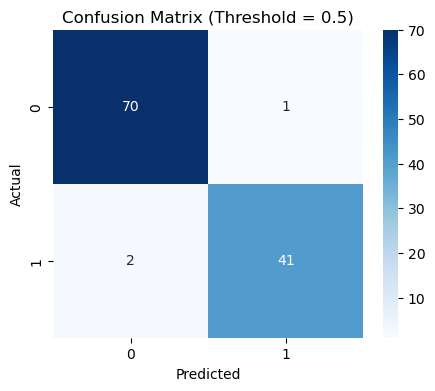


Tuned Threshold = 0.3
Confusion Matrix:
 [[67  4]
 [ 1 42]]
Precision: 0.9130434782608695
Recall: 0.9767441860465116


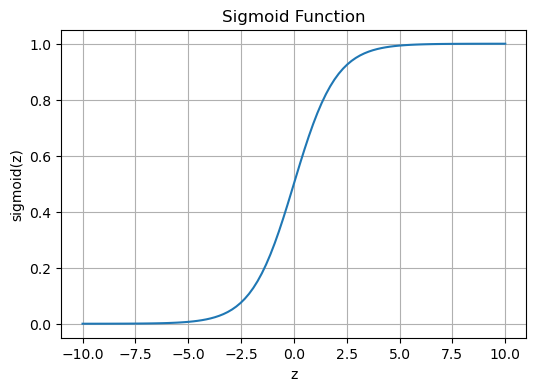

In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score, roc_auc_score, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r"C:\Users\sindh\OneDrive\Desktop\Internship\Breast Cancer Wisconsin (Diagnostic) Data Set.csv")


df = df.drop(columns=["id", "Unnamed: 32"])  # Remove unnecessary columns
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})  # Encode target: M = 1, B = 0


X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("ROC-AUC:", roc_auc)
print("Classification Report:\n", report)


plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Threshold = 0.5)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


threshold = 0.3
y_pred_custom = (y_prob >= threshold).astype(int)

conf_matrix_custom = confusion_matrix(y_test, y_pred_custom)
precision_custom = precision_score(y_test, y_pred_custom)
recall_custom = recall_score(y_test, y_pred_custom)

print("\nTuned Threshold = 0.3")
print("Confusion Matrix:\n", conf_matrix_custom)
print("Precision:", precision_custom)
print("Recall:", recall_custom)


import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
sig = sigmoid(z)

plt.figure(figsize=(6,4))
plt.plot(z, sig)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid()
plt.show()
